## Diabetes Prediction Dataset

Dataset ini disusun untuk mendukung pengembangan sistem prediksi diabetes berdasarkan data gaya hidup dan kondisi kesehatan pengguna. Dataset ini cocok digunakan dalam studi klasifikasi, analisis kesehatan, serta pengembangan model prediktif berbasis machine learning. Seluruh data dikumpulkan melalui survei dan merepresentasikan berbagai variabel terkait risiko diabetes.

## Fitur Dataset

| Nama Fitur         | Deskripsi                                               |
|--------------------|---------------------------------------------------------|
| **Gender**         | Jenis kelamin responden (Male atau Female).             |
| **Age**            | Usia responden dalam tahun.                              |
| **Hypertension**   | Status hipertensi (1 = ya, 0 = tidak).                   |
| **Heart Disease**  | Status penyakit jantung (1 = ya, 0 = tidak).             |
| **Smoking History**| Riwayat merokok responden, seperti never, former, current. |
| **BMI**            | Indeks massa tubuh.                                      |
| **HbA1c Level**    | Rata-rata kadar glukosa darah selama 2‚Äì3 bulan terakhir. |
| **Blood Glucose Level** | Tingkat glukosa darah saat ini.                      |
| **Diabetes**       | Target klasifikasi: apakah responden terindikasi diabetes (Yes atau No). |

## Sumber Dataset

Dataset ini diperoleh dari Kaggle:  
üîó [Diabetes Prediction Dataset ‚Äì Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)


## IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

## LOAD DATA

In [2]:
# Load dataset dari path
file_path = 'https://raw.githubusercontent.com/SweetAware/sweetaware-model/refs/heads/main/diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris
df.head(5)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

## EXPLORATORY DATA ANALYISIS

### Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [5]:
# Jumlah baris (data) dan kolom
rows, cols = df.shape
print(f"Jumlah data (baris): {rows}")
print(f"Jumlah fitur (kolom): {cols}")

Jumlah data (baris): 100000
Jumlah fitur (kolom): 9


In [6]:
print("Missing values:\n", df.isnull().sum().loc[lambda x: x > 0])
print("\nDuplikat:", df.duplicated().sum())

Missing values:
 Series([], dtype: int64)

Duplikat: 3854


### Univariate Analysis

In [7]:
# split feature
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

In [8]:
categorical_summary = []

for col in categorical_features:
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100

    temp_df = pd.DataFrame({
        'feature': col,
        'category': counts.index.astype(str),  # Pastikan tetap string
        'count': counts.values,
        'percentage': percentages.round(2).values
    })

    categorical_summary.append(temp_df)

categorical_summary_df = pd.concat(categorical_summary, ignore_index=True)

print("\nUnivariate Analysis - Categorical Features")
print(categorical_summary_df)



Univariate Analysis - Categorical Features
            feature     category  count  percentage
0            gender       Female  58552       58.55
1            gender         Male  41430       41.43
2            gender        Other     18        0.02
3      hypertension            0  92515       92.52
4      hypertension            1   7485        7.48
5     heart_disease            0  96058       96.06
6     heart_disease            1   3942        3.94
7   smoking_history      No Info  35816       35.82
8   smoking_history        never  35095       35.10
9   smoking_history       former   9352        9.35
10  smoking_history      current   9286        9.29
11  smoking_history  not current   6447        6.45
12  smoking_history         ever   4004        4.00
13         diabetes            0  91500       91.50
14         diabetes            1   8500        8.50


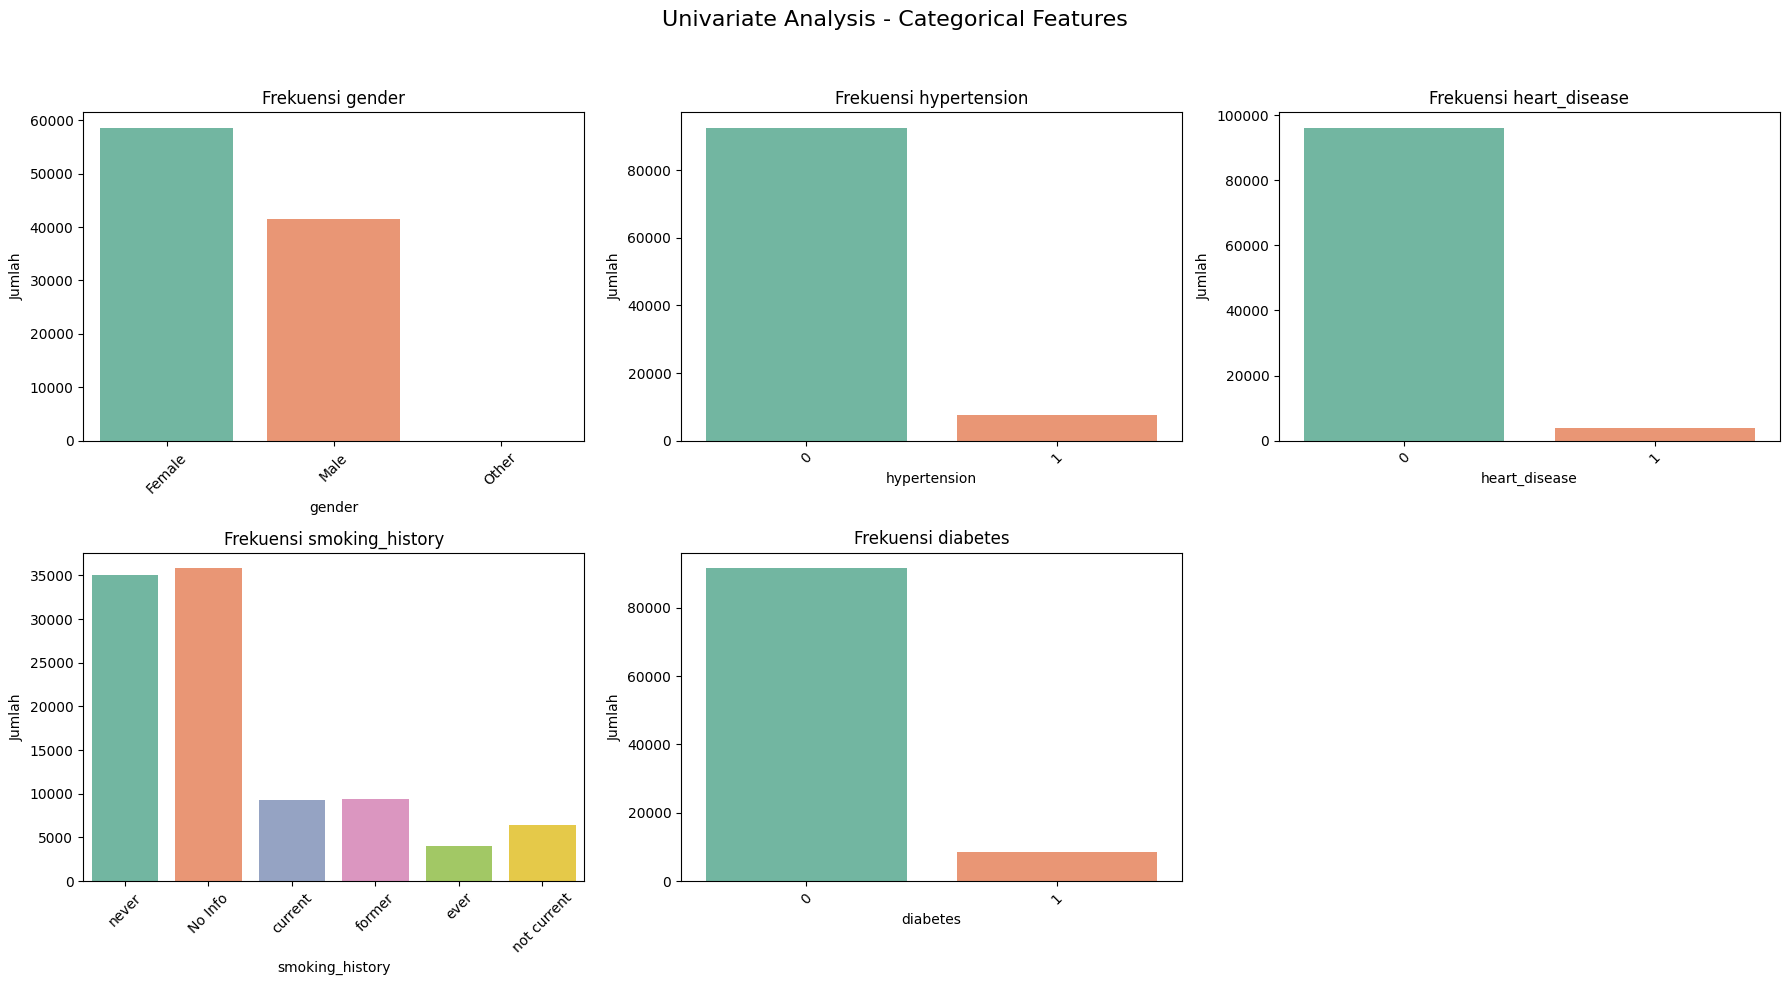

In [9]:
plt.figure(figsize=(18, 10))

# Buat subplot untuk masing-masing fitur kategorikal
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)  # tambahkan hue=col & legend=False
    plt.title(f'Frekuensi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

plt.suptitle('Univariate Analysis - Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


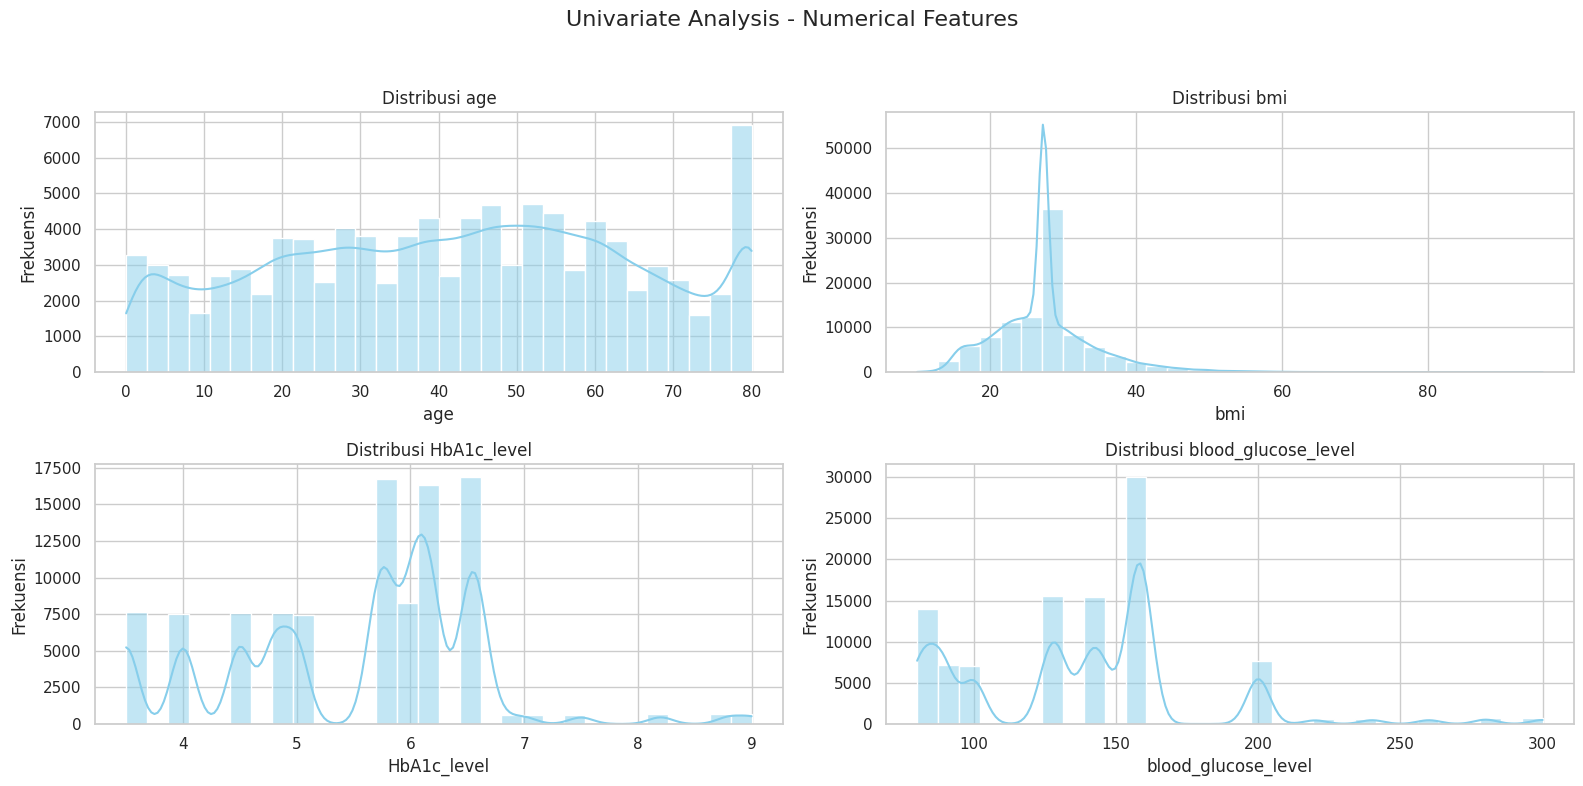

In [10]:
# Set gaya visual
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

# Buat subplot untuk masing-masing fitur numerik
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.suptitle('Univariate Analysis - Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Multivariate Analysis

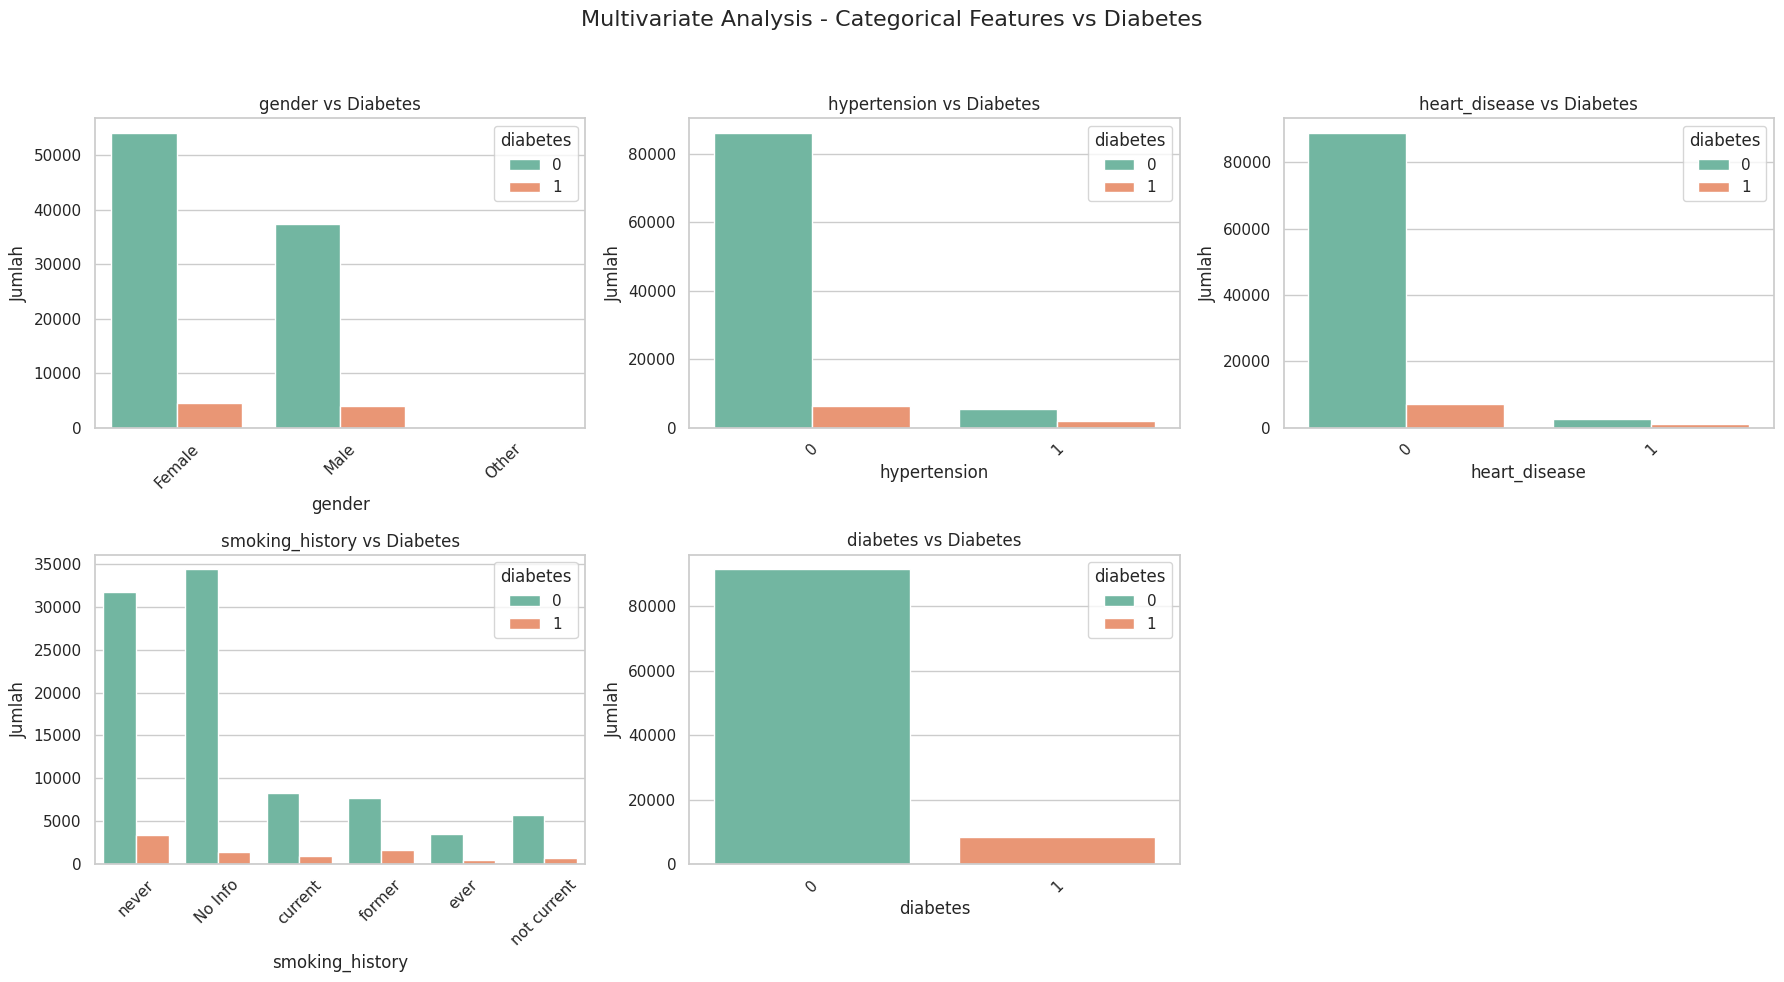

In [11]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='diabetes', palette='Set2')
    plt.title(f'{col} vs Diabetes')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

plt.suptitle('Multivariate Analysis - Categorical Features vs Diabetes', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


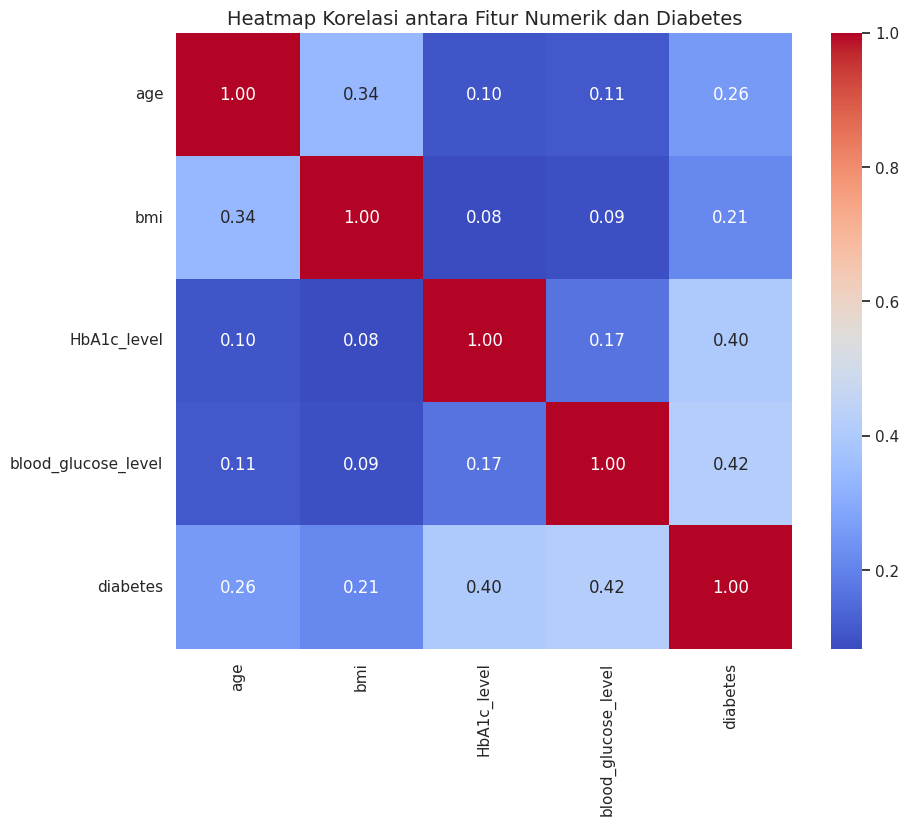

In [12]:
# Jika 'diabetes' masih bertipe object, ubah ke numerik
df_corr = df.copy()
if df_corr['diabetes'].dtype == 'object':
    df_corr['diabetes'] = df_corr['diabetes'].map({'Yes': 1, 'No': 0})

# Hitung korelasi
plt.figure(figsize=(10, 8))
correlation = df_corr[numerical_features + ['diabetes']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi antara Fitur Numerik dan Diabetes", fontsize=14)
plt.show()


## PREPROCESSING

### Tangani Duplikasi

In [14]:
# Hapus duplikasi
df = df.drop_duplicates()

# Cek jumlah data duplikat yang tersisa
duplicates_remaining = df.duplicated().sum()
print(f"Jumlah data duplikat setelah penghapusan: {duplicates_remaining}")

Jumlah data duplikat setelah penghapusan: 0


In [15]:
# Membuat fungsi untuk menentukan kategori risiko
def tentukan_risiko(row):
    # Kategori HIGH RISK: Jika sudah terdiagnosis diabetes atau level HbA1c/Glukosa sangat tinggi
    if row['diabetes'] == 1 or row['HbA1c_level'] > 6.4 or row['blood_glucose_level'] > 200:
        return 'High Risk'
    # Kategori LOW RISK: Jika semua indikator utama dalam rentang normal
    elif row['HbA1c_level'] < 5.7 and row['blood_glucose_level'] < 140 and row['bmi'] < 25:
        return 'Low Risk'
    # Kategori MODERATE RISK: Kondisi di antara Low dan High (area prediabetes atau faktor risiko lain)
    else:
        return 'Moderate Risk'

In [16]:
# Terapkan fungsi untuk membuat kolom target baru
df['risk_category'] = df.apply(tentukan_risiko, axis=1)

In [17]:
# Hapus kolom 'diabetes' yang lama karena sudah digantikan 'risk_category'
df = df.drop('diabetes', axis=1)

In [18]:
# Tampilkan distribusi kategori baru
print("Distribusi Kategori Risiko Baru:")
print(df['risk_category'].value_counts())

Distribusi Kategori Risiko Baru:
risk_category
Moderate Risk    67005
High Risk        23406
Low Risk          5735
Name: count, dtype: int64


### Encode Categorical

In [19]:
from sklearn.preprocessing import LabelEncoder
# Encode semua fitur object/kategorikal
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('risk_category', axis=1)
y = df['risk_category']

In [21]:
# --- PENTING: One-Hot Encode target untuk multi-kelas ---
# Mengubah label y menjadi format one-hot encoding (misal: High Risk -> [0,0,1])
y_categorical = tf.keras.utils.to_categorical(y, num_classes=3)

## SPLIT DATA

In [22]:
# Split data menggunakan target yang sudah di-one-hot-encode
X_train, X_test, y_train_cat, y_test_cat = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# Scaling fitur setelah splitting
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shape X_train:", X_train.shape)
print("Shape y_train_cat:", y_train_cat.shape)

Shape X_train: (76916, 8)
Shape y_train_cat: (76916, 3)


## MODELLING & EVALUASI

In [24]:
# Perhatikan perubahan pada layer terakhir
model_multiclass = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(8, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    # --- PERUBAHAN UTAMA ---
    # 3 unit untuk 3 kelas, dan aktivasi 'softmax' untuk multi-kelas
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Menggunakan 'categorical_crossentropy' untuk loss function
model_multiclass.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Latih model baru
model_multiclass.fit(
    X_train, y_train_cat,  # Gunakan y_train_cat
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
1923/1923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 4ms/step - accuracy: 0.8161 - loss: 0.5006 - val_accuracy: 0.9464 - val_loss: 0.2023
Epoch 2/100
1923/1923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9526 - loss: 0.1881 - val_accuracy: 0.9628 - val_loss: 0.1549
Epoch 3/100
1923/1923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 3ms/step - accuracy: 0.9663 - loss: 0.1494 - val_accuracy: 0.9739 - val_loss: 0.1325
Epoch 4/100
1923/1923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9732 - loss: 0.1271 - val_accuracy: 0.9745 - val_loss: 0.1214
Epoch 5/100
1923/1923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 3ms/step - accuracy: 0.9728 - loss: 0.1234 - val_accuracy: 0.9760 - val_loss: 0.1140
Epoch 6/100
1923/1923 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 3ms/step - accuracy: 0.9767 - loss: 0.1121 - val_accurac

In [29]:
loss, accuracy = model_multiclass.evaluate(X_test, y_test_cat)
print(f"Akurasi pada data test: {accuracy:.2f}")

601/601 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0814
Akurasi pada data test: 0.98


601/601 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1ms/step


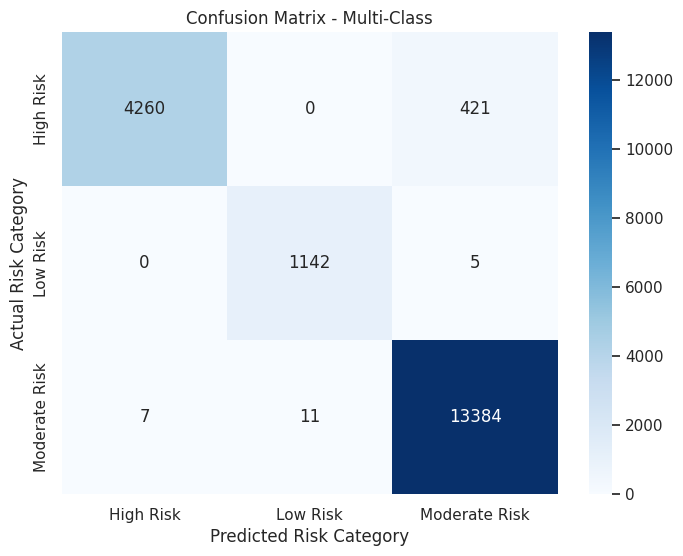

Classification Report:\n
               precision    recall  f1-score   support

    High Risk       1.00      0.91      0.95      4681
     Low Risk       0.99      1.00      0.99      1147
Moderate Risk       0.97      1.00      0.98     13402

     accuracy                           0.98     19230
    macro avg       0.99      0.97      0.98     19230
 weighted avg       0.98      0.98      0.98     19230

\nEvaluation Metrics (Weighted Avg):
Accuracy : 0.9769
Precision: 0.9775
Recall   : 0.9769
F1-Score : 0.9766
AUC-ROC  : 0.9950


In [30]:
# Prediksi probabilitas untuk setiap kelas pada data test
y_pred_prob_multi = model_multiclass.predict(X_test)

# Ambil kelas dengan probabilitas tertinggi sebagai prediksi akhir (0, 1, atau 2)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)

# Kita juga memerlukan label y_test dalam format indeks (bukan one-hot) untuk confusion matrix
y_test_indices = np.argmax(y_test_cat, axis=1)

# Definisikan label kategori risiko untuk plotting
risk_labels = label_encoders['risk_category'].classes_

# --- Confusion Matrix untuk 3 Kelas ---
cm_multi = confusion_matrix(y_test_indices, y_pred_multi)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=risk_labels,
            yticklabels=risk_labels)
plt.xlabel('Predicted Risk Category')
plt.ylabel('Actual Risk Category')
plt.title('Confusion Matrix - Multi-Class')
plt.show()


# --- Laporan Klasifikasi Lengkap ---
print("Classification Report:\\n")
print(classification_report(y_test_indices, y_pred_multi, target_names=risk_labels))


# --- Metrik Evaluasi Secara Eksplisit ---
accuracy = accuracy_score(y_test_indices, y_pred_multi)
# Menggunakan average='weighted' untuk memperhitungkan ketidakseimbangan kelas
precision = precision_score(y_test_indices, y_pred_multi, average='weighted')
recall = recall_score(y_test_indices, y_pred_multi, average='weighted')
f1 = f1_score(y_test_indices, y_pred_multi, average='weighted')
# Menggunakan One-vs-Rest (ovr) untuk AUC pada multi-kelas
auc = roc_auc_score(y_test_cat, y_pred_prob_multi, multi_class='ovr', average='weighted')

print("\\nEvaluation Metrics (Weighted Avg):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")

## Convert Model

### Simpan ke h5

In [31]:
model_multiclass.save("model_multiclass.h5")

### Convert ke TensorFlow.js

In [32]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras model_multiclass.h5 tfjs_model

2025-06-12 13:11:19.038429: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749733879.058217    7772 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749733879.064315    7772 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
üå≤ Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


### Saved Model Format

In [33]:
# Save model in SavedModel format
saved_model_dir_multiclass = 'saved_model_multiclass'
os.makedirs(saved_model_dir_multiclass, exist_ok=True)
model_multiclass.export(saved_model_dir_multiclass)
print("Model multi-kelas berhasil disimpan dalam format SavedModel.")

Saved artifact at 'saved_model_multiclass'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140467510181136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140467510180752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140467509018896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140467509024848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140467510179024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140467509018704: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model multi-kelas berhasil disimpan dalam format SavedModel.


### Convert ke TF Lite

In [34]:
# --- Kode ini disesuaikan untuk model multi-kelas ---

# Konversi ke TFLite dari direktori model yang benar
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model_multiclass")
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()

# Simpan model.tflite ke direktori baru untuk membedakannya
tflite_dir = "tflite_multiclass"
os.makedirs(tflite_dir, exist_ok=True)
with open(os.path.join(tflite_dir, "model_multiclass.tflite"), "wb") as f:
    f.write(tflite_model)

# --- PENTING: Gunakan label yang benar dari LabelEncoder ---
# Label yang kita buat di Langkah 2, bukan label gambar
labels = label_encoders['risk_category'].classes_
with open(os.path.join(tflite_dir, "label.txt"), "w") as f:
    for label in labels:
        f.write(label + "\\n")

print(f"Model TFLite dan label.txt berhasil disimpan di direktori '{tflite_dir}'.")

Model TFLite dan label.txt berhasil disimpan di direktori 'tflite_multiclass'.


In [35]:
!zip -r all_converted_model_multiclass.zip saved_model_multiclass tfjs_model tflite_multiclass

  adding: saved_model_multiclass/ (stored 0%)
  adding: saved_model_multiclass/variables/ (stored 0%)
  adding: saved_model_multiclass/variables/variables.index (deflated 58%)
  adding: saved_model_multiclass/variables/variables.data-00000-of-00001 (deflated 57%)
  adding: saved_model_multiclass/fingerprint.pb (stored 0%)
  adding: saved_model_multiclass/assets/ (stored 0%)
  adding: saved_model_multiclass/saved_model.pb (deflated 84%)
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 1%)
  adding: tfjs_model/model.json (deflated 78%)
  adding: tflite_multiclass/ (stored 0%)
  adding: tflite_multiclass/model_multiclass.tflite (deflated 35%)
  adding: tflite_multiclass/label.txt (deflated 25%)


## INFERENCE

In [37]:
# Asumsi variabel 'model_multiclass', 'scaler', dan 'label_encoders' sudah ada.
risk_labels = label_encoders['risk_category'].classes_

# Mengambil input dari pengguna
gender = input("Gender (Male/Female): ")
age = int(input("Umur: "))
hypertension = int(input("Hipertensi (0 = Tidak, 1 = Ya): "))
heart_disease = int(input("Penyakit jantung (0 = Tidak, 1 = Ya): "))
smoking_history = input("Riwayat merokok (never/former/current): ")
bmi = float(input("BMI: "))
hba1c = float(input("HbA1c Level: "))
glucose = float(input("Blood Glucose Level: "))

# Membuat DataFrame dari input
try:
    gender_encoded = label_encoders['gender'].transform([gender])[0]
    smoking_history_encoded = label_encoders['smoking_history'].transform([smoking_history])[0]

    sample = pd.DataFrame([{
        'gender': gender_encoded,
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'smoking_history': smoking_history_encoded,
        'bmi': bmi,
        'HbA1c_level': hba1c,
        'blood_glucose_level': glucose
    }])

    sample_scaled = scaler.transform(sample)

    # Prediksi dengan model multi-kelas
    pred_prob_multiclass = model_multiclass.predict(sample_scaled)

    # Ambil array probabilitas dan kelas prediksi
    probabilities = pred_prob_multiclass[0]
    predicted_index = np.argmax(probabilities)
    predicted_risk = risk_labels[predicted_index]

    # Menampilkan hasil dengan format persentase
    print("\n--- Hasil Prediksi ---")
    print("Probabilitas per Kelas:")
    for i in range(len(risk_labels)):
        label = risk_labels[i]
        probability = probabilities[i]
        print(f"- {label:<15}: {probability:.2%}") # Format ke persentase

    print(f"\nPrediksi Kategori Risiko: {predicted_risk}")

except Exception as e:
    print(f"\nTerjadi error: {e}. Pastikan input sesuai.")

Gender (Male/Female): Male
Umur: 22
Hipertensi (0 = Tidak, 1 = Ya): 0
Penyakit jantung (0 = Tidak, 1 = Ya): 1
Riwayat merokok (never/former/current): current
BMI: 29
HbA1c Level: 7.2
Blood Glucose Level: 210
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 154ms/step

--- Hasil Prediksi ---
Probabilitas per Kelas:
- High Risk      : 100.00%
- Low Risk       : 0.00%
- Moderate Risk  : 0.00%

Prediksi Kategori Risiko: High Risk
